# VOLTMETRO

OBIETTIVO: stimare la resistenza interna del voltmetro

PROCEDIMENTO: usando resistenze dell'ordine dei MΩ misuriamo la corrente di una resistenza equivalente data da $R_{eq} = \frac{R_v R}{Rv + R}$

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * 10**6 #megaOHM
sigmaRpercent = 1 # 1% 
I = np.array(fr['uA']) * 10**-6 #microAmpere
sigmaI = 0.01 * 10**-6
V = 5.01 # mantenuta costante
sigmaV = 0.01

In [15]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

dato che $V=RI \Rightarrow I(R) \propto \frac{1}{R} $

In [20]:
def IRv(R,Rv): # V = 5.01
    return V*(1/R + 1/Rv)

err = np.sqrt(sigmaV**2 + sigmaI**2)
i = Interpolazione(R,I,IRv,err,p0=[10*10**6]) # ordine 10MΩ

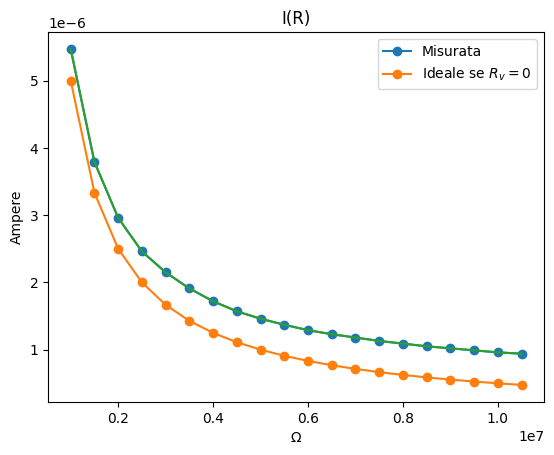

   
Parameters: [10768420.54316816] 
Sigma parameters: [39101.17821316]

sigmaY: 1e-08

chiquadro ridotto: 0.51
df: 19
pvalue: 100.0%
covariance matrix: [[1.37983418e+09]]    



In [17]:
plt.title('I(R)')
plt.plot(R,I,label='Misurata',marker='o')
plt.plot(R,V/R,label='Ideale se $R_v = 0$',marker='o')
plt.plot(i.X,i.Y)
plt.ylabel('Ampere')
plt.xlabel('Ω')
plt.legend()
plt.show()
print(i)

### Calcolo $R_v$:

$
V = R_{eq}I \Rightarrow V = \frac{R_v R}{Rv + R}I \Rightarrow R_v = \frac{VR}{IR-V}
$

(10.77 ± 0.16)e6 Ω


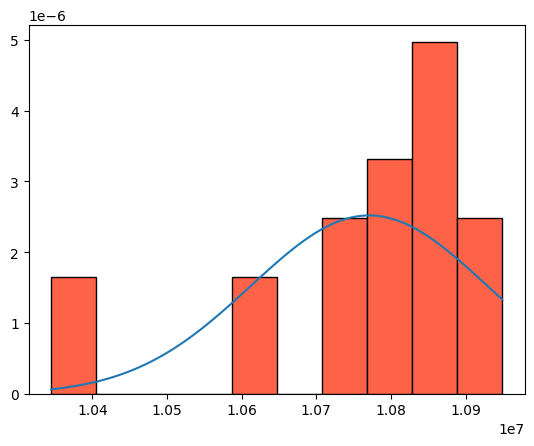

In [18]:
Rv = V*R / (I*R - V)
print(final_val(Rv.mean(),Rv.std(),2,6,'Ω'))
plt.hist(Rv,density=True,edgecolor='black',color='tomato')
X = np.linspace(min(Rv),max(Rv),100)
Y = sc.norm.pdf(X,loc=Rv.mean(),scale=Rv.std())
plt.plot(X,Y)
plt.show()